#### Kaufmann 2017 abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Kaufmann 2017 data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230308**

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import matplotlib.pyplot as plt
import pybiomart as biomart
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [2]:
%matplotlib inline

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
future              0.18.3
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
j

### Read in datasets

In [3]:
# Separate mtx files given for control and infected cells, but only 1 gene and 1 barcodes files were given; will read in in separate commands

adata_pbs_mtx_transposed = sc.read_mtx('/Volumes/LaCie/data_lake/Mairi_example/INBOX/sc_downloads/kaufmann_2017/pbs_matrix/matrix_pbs.mtx').T 
adata_pbs_mtx_transposed

AnnData object with n_obs × n_vars = 737280 × 27998

In [4]:
adata_pbs_mtx_transposed.obs

""
0
1
2
3
4
...
737275
737276
737277
737278


In [5]:
adata_pbs_mtx_transposed.var

""
0
1
2
3
4
...
27993
27994
27995
27996


In [6]:
# Will read in infected matrix with genes/barcondes tsv files for ease - is this correct/required?

adata_infected = sc.read_10x_mtx('/Volumes/LaCie/data_lake/Mairi_example/INBOX/sc_downloads/kaufmann_2017/bcg_mtx_files/')
adata_infected

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 737280 × 27998
    var: 'gene_ids'

### Make names unique


In [7]:
adata_pbs_mtx_transposed.var_names_make_unique()
adata_infected.var_names_make_unique()

### Concatenate

In [8]:
adata_total = adata_pbs_mtx_transposed.concatenate(adata_infected, join='outer', batch_key='experiment', batch_categories=["PBS", "BCG"])
adata_total

/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 1474560 × 55996
    obs: 'experiment'
    var: 'gene_ids-BCG'

In [9]:
adata_total.var

,gene_ids-BCG
0,NaN
0610007P14Rik,ENSMUSG00000021252
0610009B22Rik,ENSMUSG00000007777
0610009L18Rik,ENSMUSG00000043644
0610009O20Rik,ENSMUSG00000024442
...,...
mt-Nd3,ENSMUSG00000064360
mt-Nd4,ENSMUSG00000064363
mt-Nd4l,ENSMUSG00000065947
mt-Nd5,ENSMUSG00000064367


In [10]:
adata_total.obs


,experiment
0-PBS,PBS
1-PBS,PBS
2-PBS,PBS
3-PBS,PBS
4-PBS,PBS
...,...
TTTGTCATCTTTACAC-1-BCG,BCG
TTTGTCATCTTTACGT-1-BCG,BCG
TTTGTCATCTTTAGGG-1-BCG,BCG
TTTGTCATCTTTAGTC-1-BCG,BCG


In [11]:
# Make names unique to avoid computational issues re repeated gene names
adata_total.var_names_make_unique()
sample_object = adata_total.copy()
sample_object

AnnData object with n_obs × n_vars = 1474560 × 55996
    obs: 'experiment'
    var: 'gene_ids-BCG'

In [12]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

### Top 20 scatterplot

normalizing counts per cell


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:00)


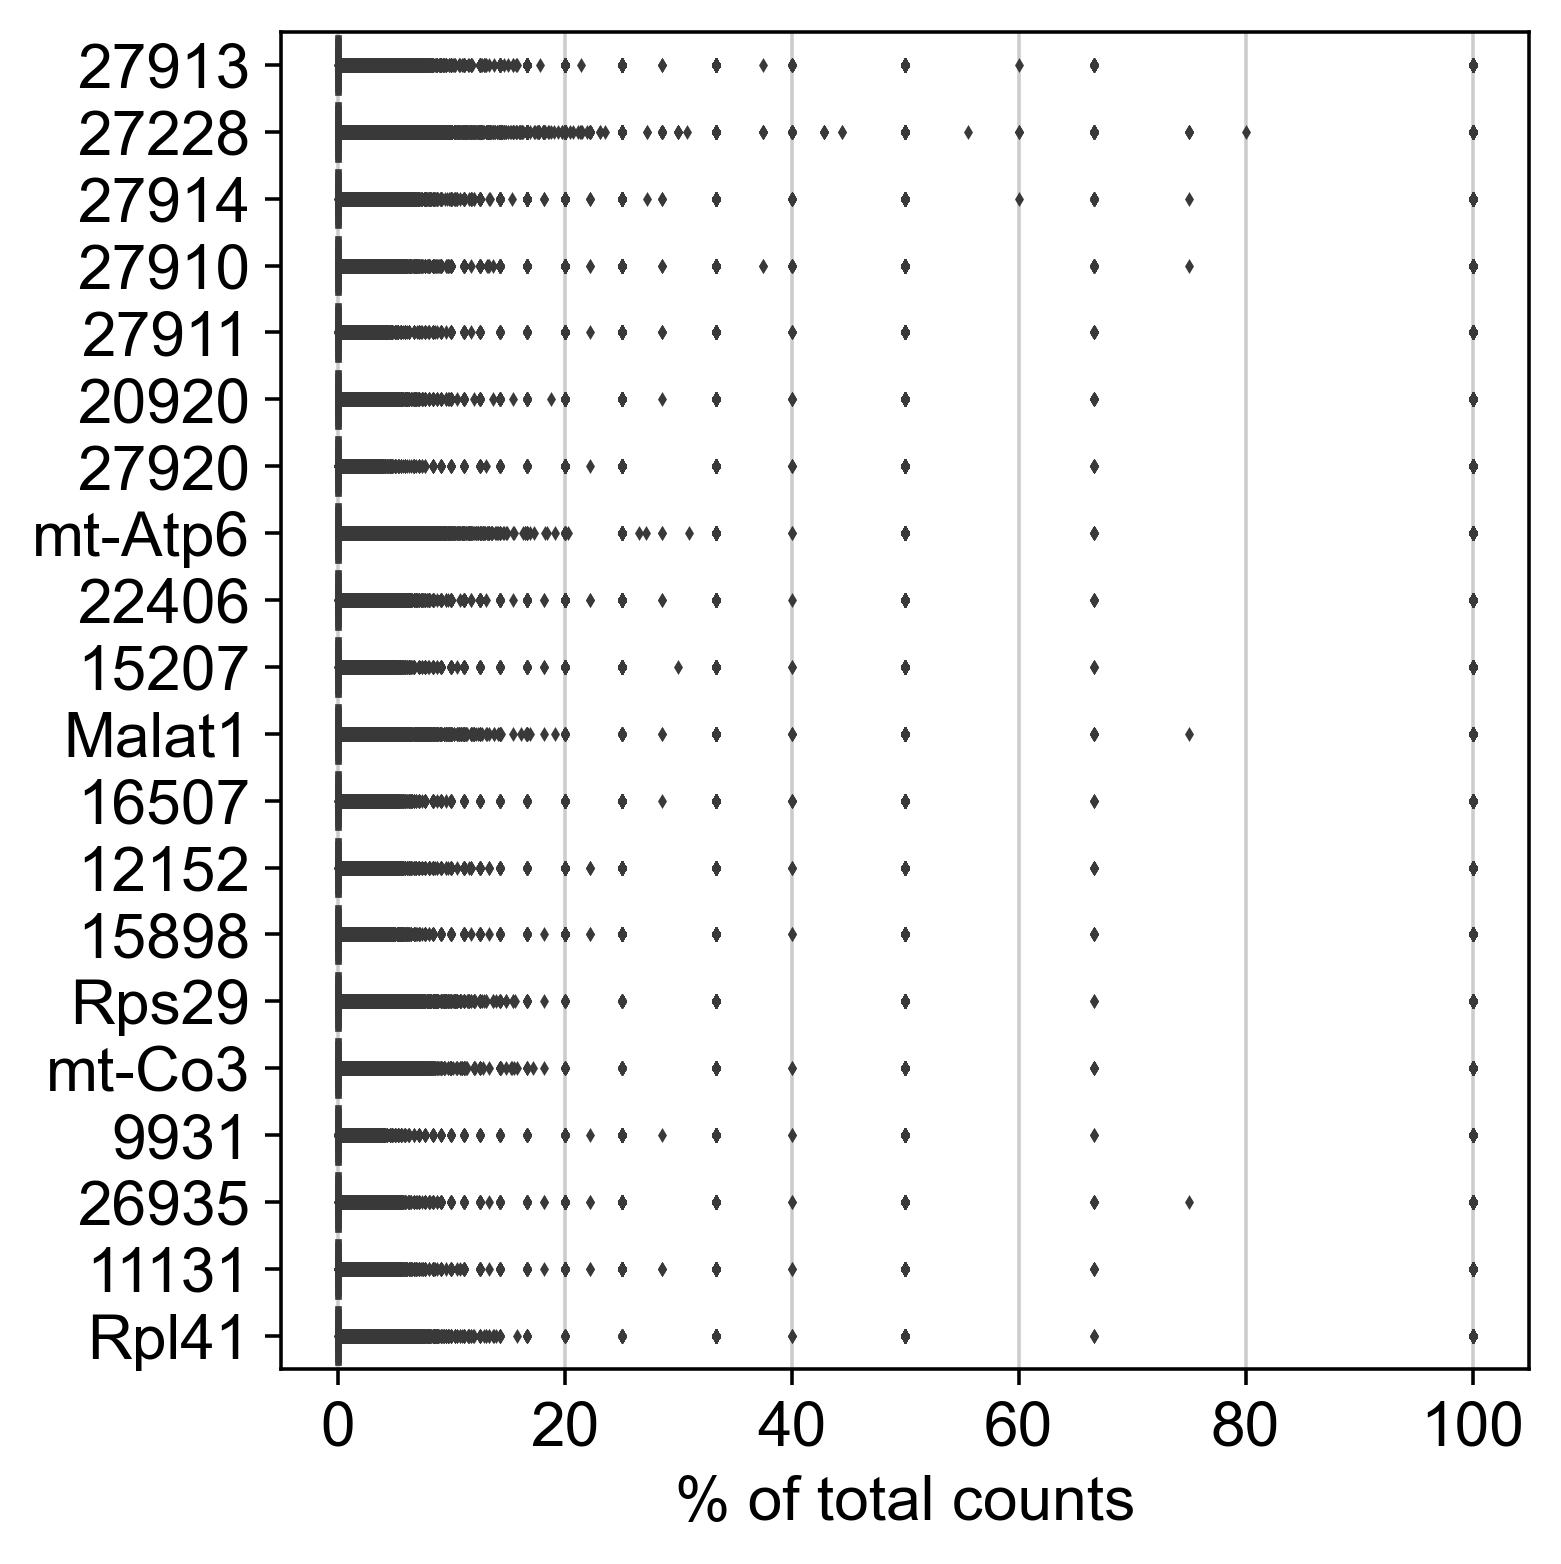

In [13]:
sc.pl.highest_expr_genes(sample_object, n_top=20)

### Intital filtering

- By gene

In [14]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 1464814 cells that have less than 200 genes expressed
9746 55996


- By cell

In [15]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 26821 genes that are detected in less than 3 cells


(9746, 29175)

### QC metrics

In [16]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('mt-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("Rps","Rpl"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^Hb[^(P)]"))
sample_object.var

,gene_ids-BCG,n_cells,mt,ribo,hb
0610007P14Rik,ENSMUSG00000021252,1156,False,False,False
0610009B22Rik,ENSMUSG00000007777,869,False,False,False
0610009L18Rik,ENSMUSG00000043644,215,False,False,False
0610009O20Rik,ENSMUSG00000024442,573,False,False,False
0610010F05Rik,ENSMUSG00000042208,215,False,False,False
...,...,...,...,...,...
mt-Nd3,ENSMUSG00000064360,2108,True,False,False
mt-Nd4,ENSMUSG00000064363,2420,True,False,False
mt-Nd4l,ENSMUSG00000065947,1638,True,False,False
mt-Nd5,ENSMUSG00000064367,2017,True,False,False


In [17]:
sample_object.var['mt'].value_counts()

mt
False    29162
True        13
Name: count, dtype: int64

In [18]:
sample_object.var['ribo'].value_counts()

ribo
False    29065
True       110
Name: count, dtype: int64

In [19]:
sample_object.var['hb'].value_counts()

hb
False    29168
True         7
Name: count, dtype: int64

In [20]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [21]:
sample_object.obs

,experiment,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
7-PBS,PBS,4004,4003,15616.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
37-PBS,PBS,338,338,501.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
179-PBS,PBS,635,635,1121.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
296-PBS,PBS,2073,2073,5466.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
436-PBS,PBS,2418,2418,7798.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGCCCGTT-1-BCG,BCG,3076,3074,9899.0,268.0,2.707344,3088.0,31.195072,0.0,0.000000
TTTGTCAAGTTGTCGT-1-BCG,BCG,324,323,730.0,299.0,40.958904,78.0,10.684931,0.0,0.000000
TTTGTCAGTAGGCTGA-1-BCG,BCG,505,505,916.0,280.0,30.567684,83.0,9.061135,0.0,0.000000
TTTGTCAGTCTCACCT-1-BCG,BCG,345,345,522.0,4.0,0.766284,198.0,37.931034,0.0,0.000000


- QC visualisation

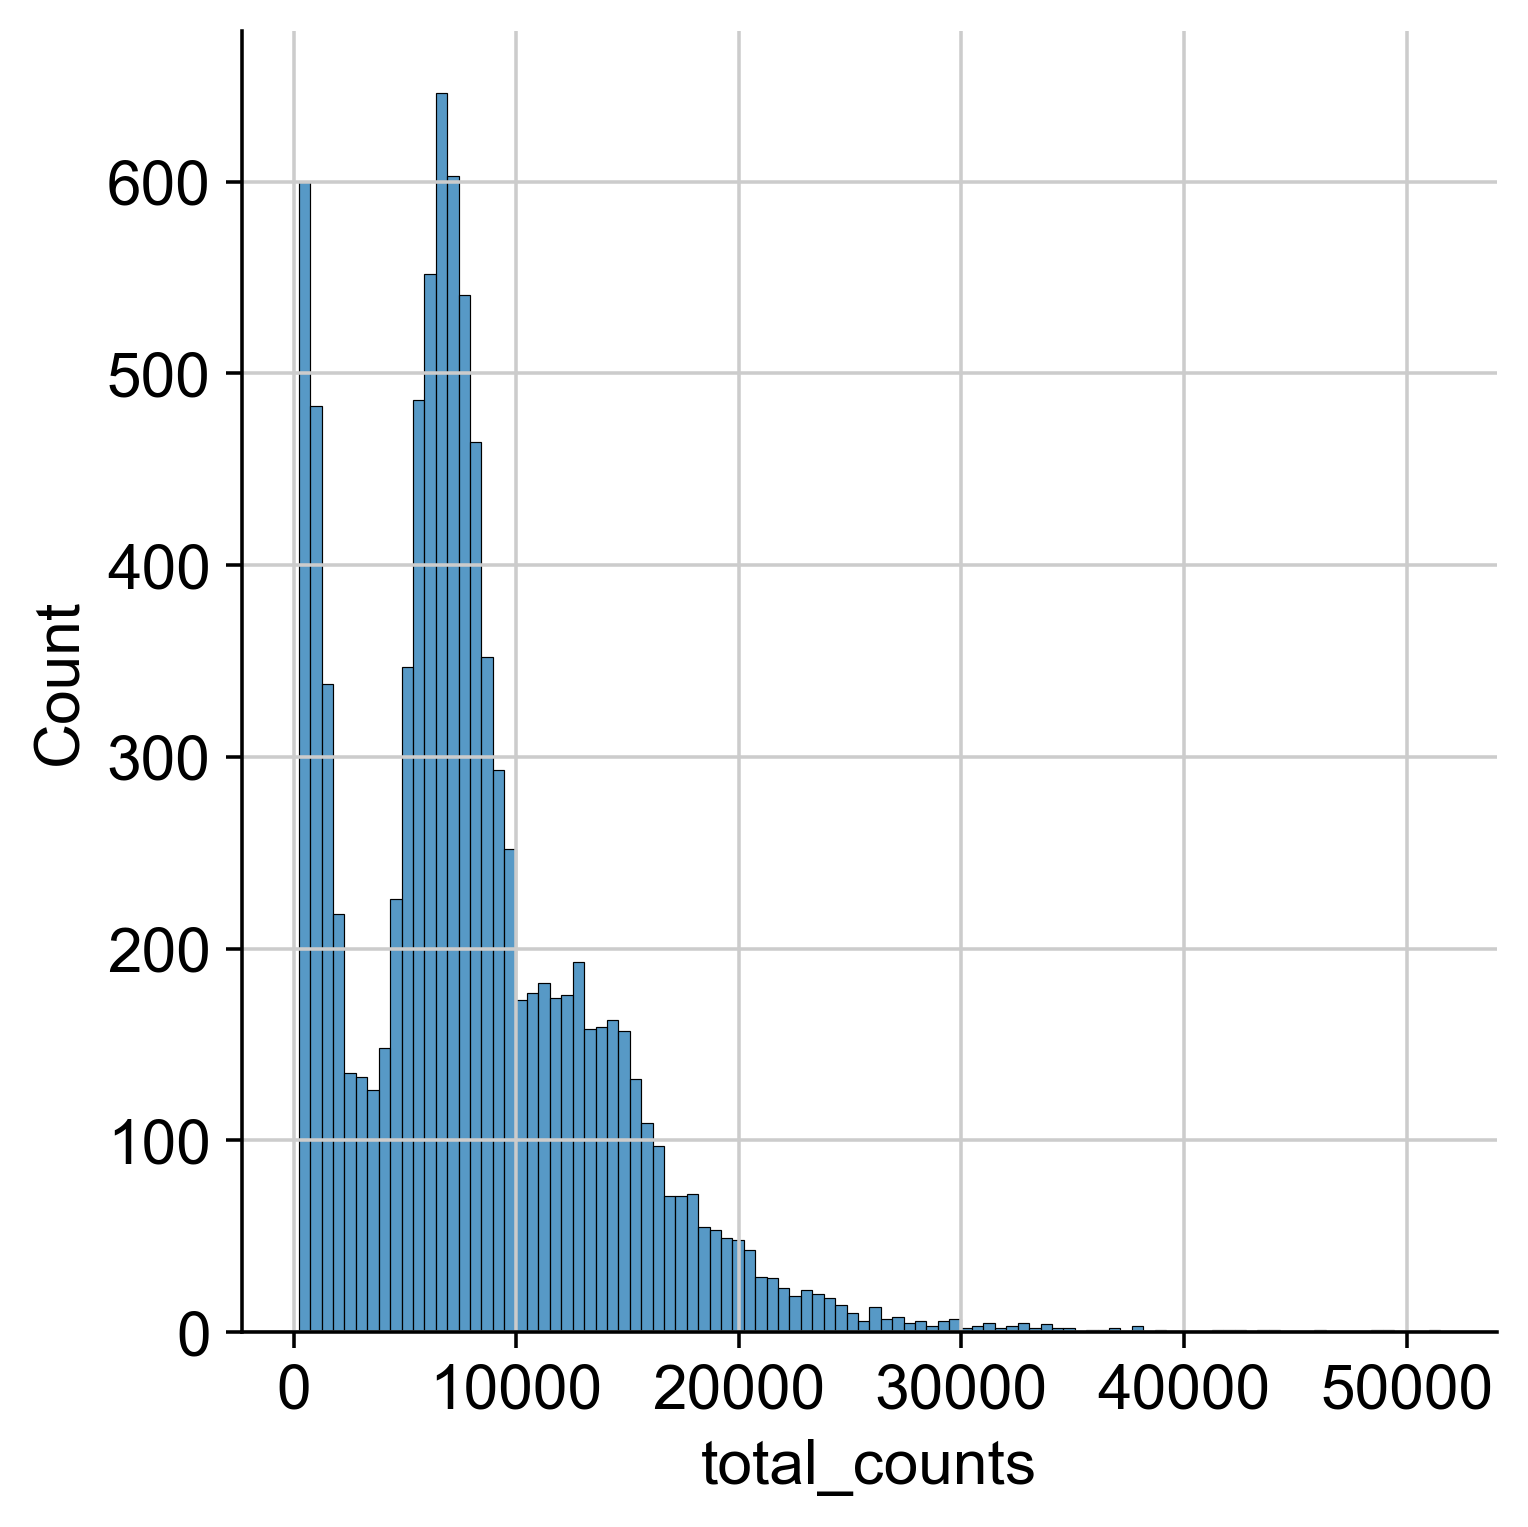

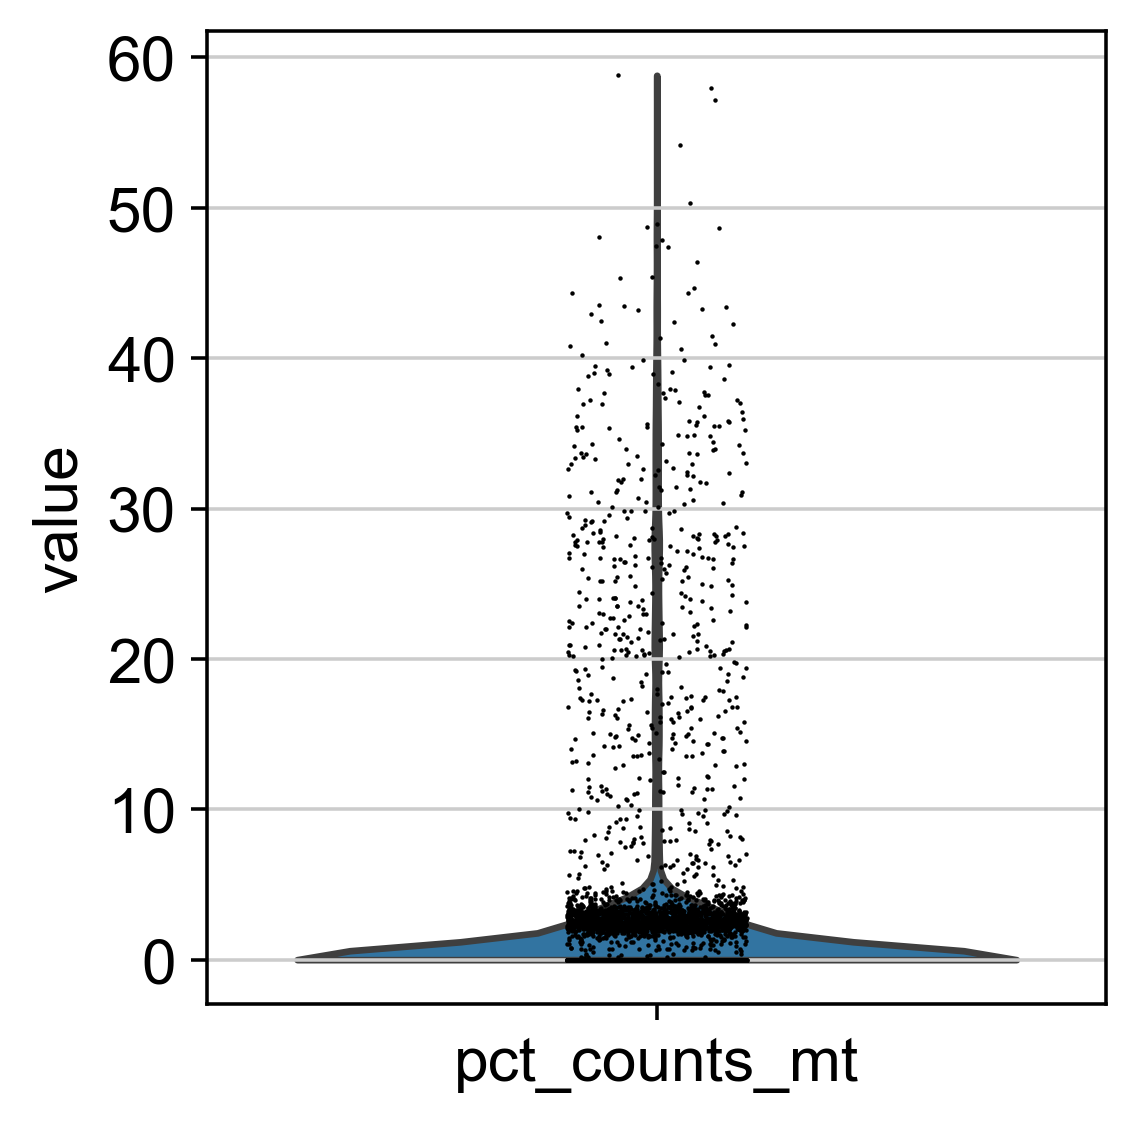

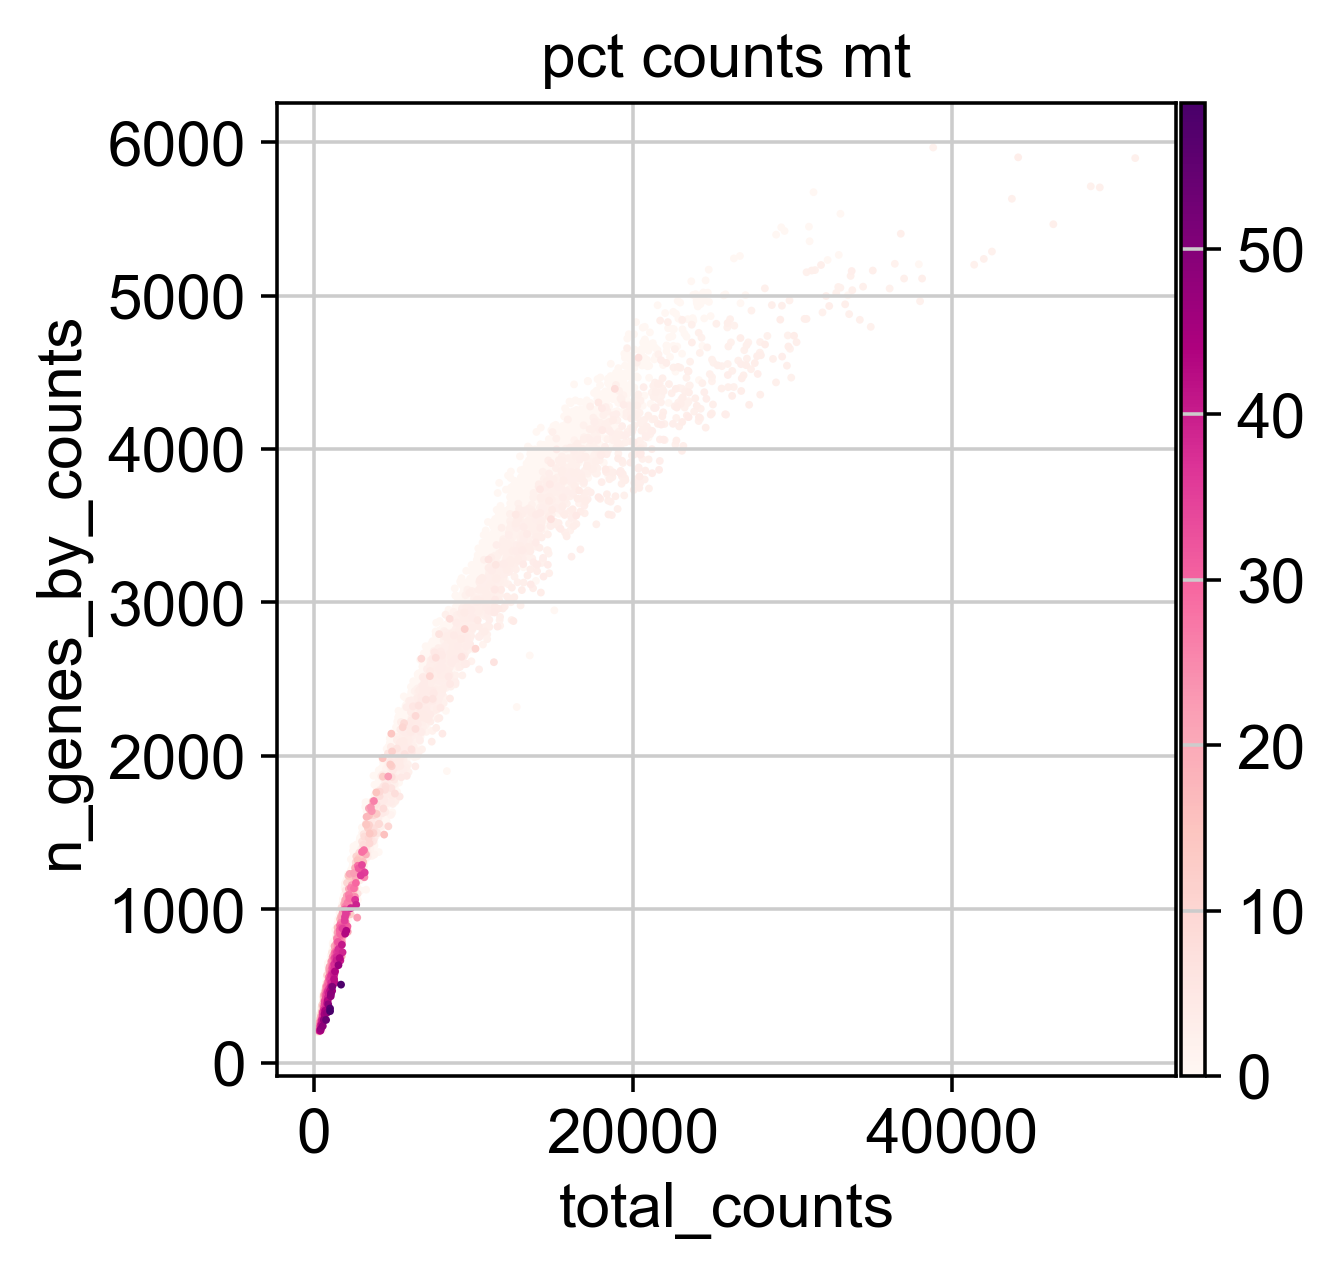

In [22]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

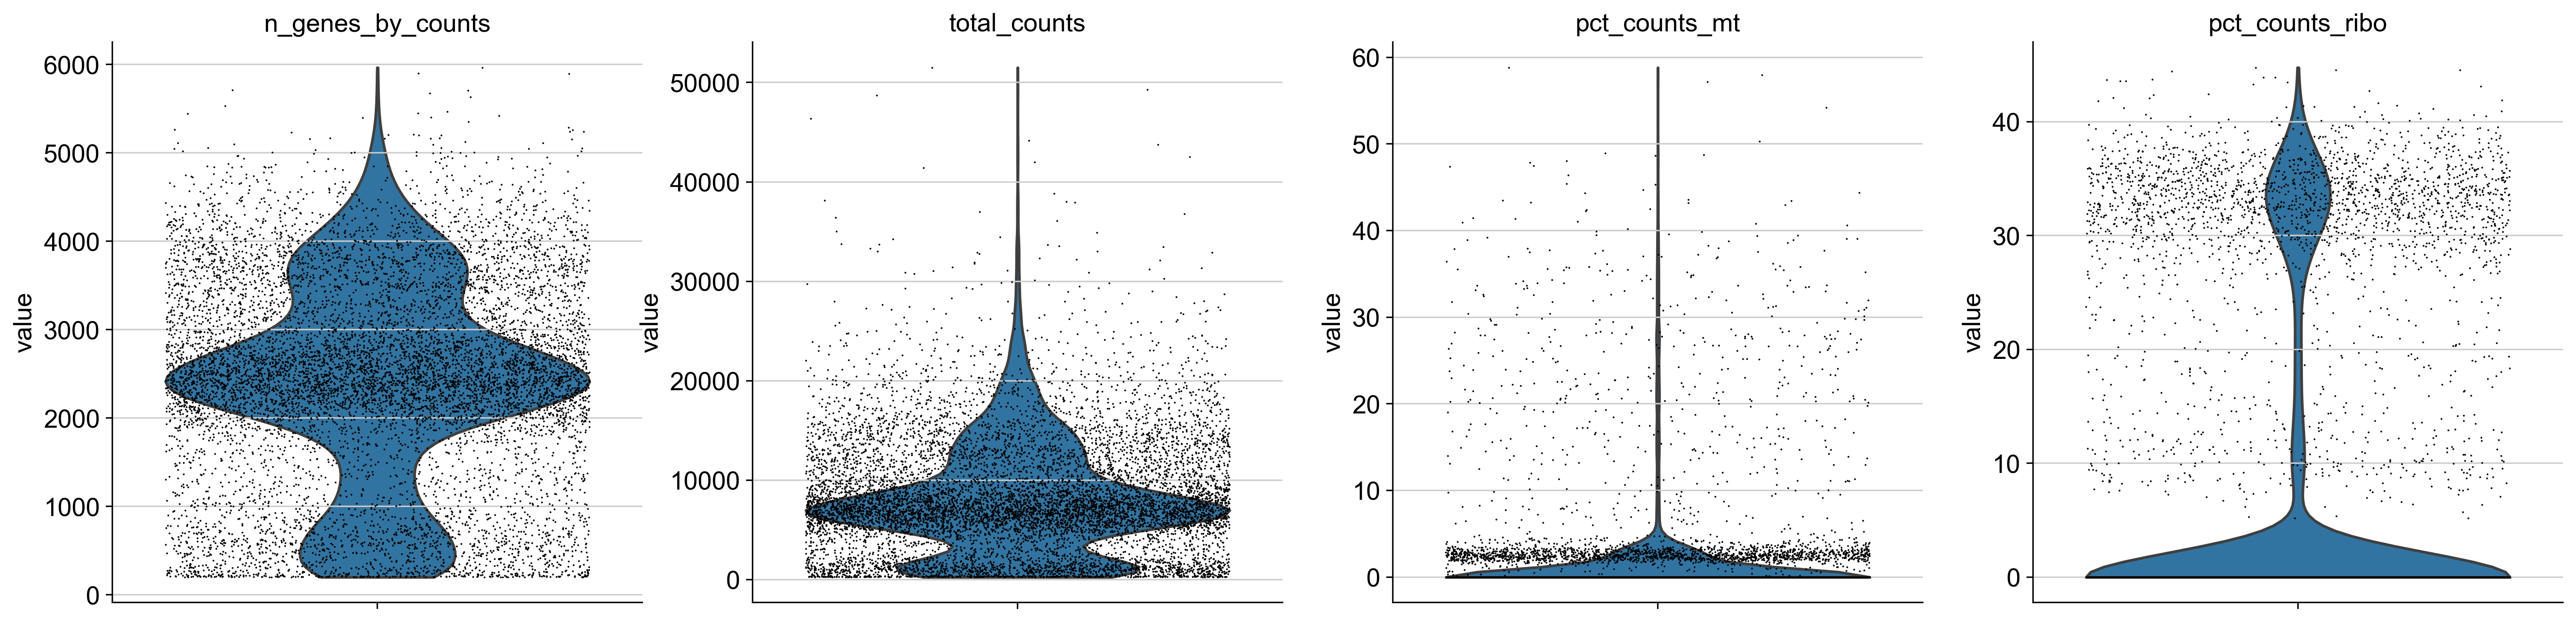

In [23]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [24]:
sample_object

AnnData object with n_obs × n_vars = 9746 × 29175
    obs: 'experiment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids-BCG', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

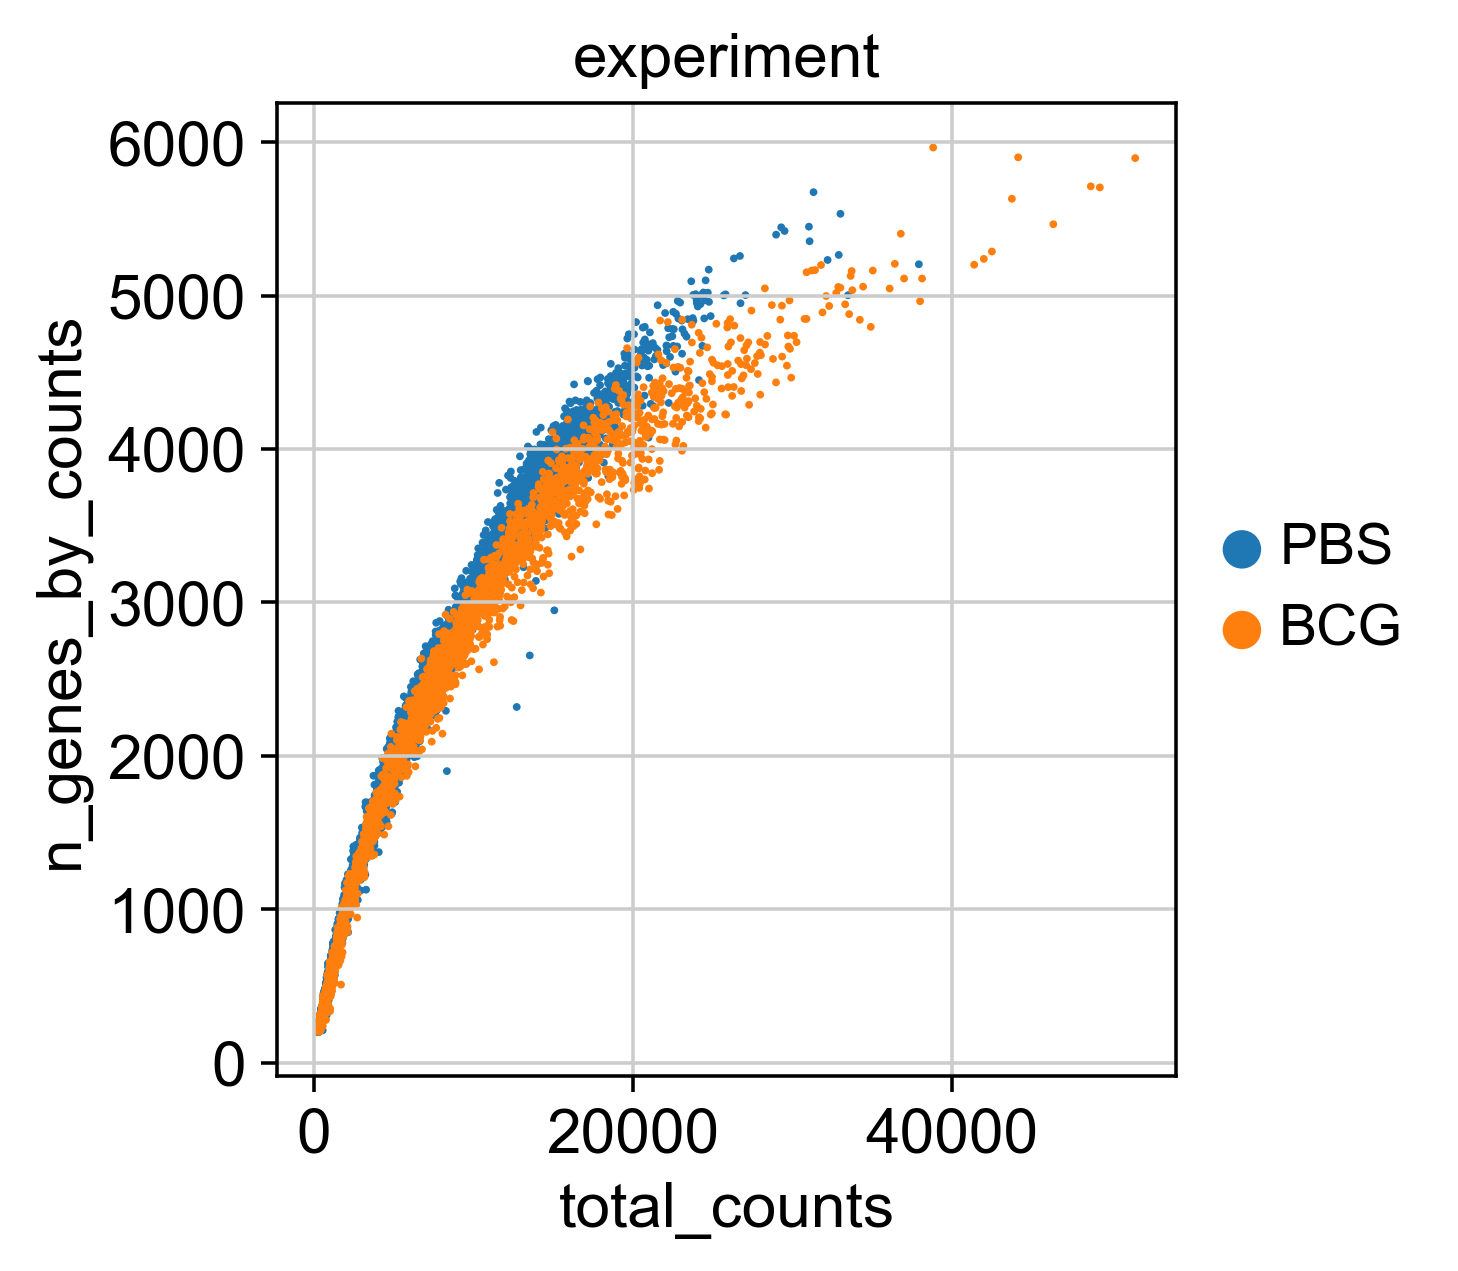

In [25]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "experiment")

### QC-based filtering

In [26]:
sample_object.obs.head()

,experiment,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
7-PBS,PBS,4004,4003,15616.0,0.0,0.0,0.0,0.0,0.0,0.0
37-PBS,PBS,338,338,501.0,0.0,0.0,0.0,0.0,0.0,0.0
179-PBS,PBS,635,635,1121.0,0.0,0.0,0.0,0.0,0.0,0.0
296-PBS,PBS,2073,2073,5466.0,0.0,0.0,0.0,0.0,0.0,0.0
436-PBS,PBS,2418,2418,7798.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
sample_object.shape

(9746, 29175)

In [28]:
sample_object.obs["mt_ok"] = sample_object.obs['pct_counts_mt'] <= 20
sample_object.obs.head()


,experiment,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,mt_ok
7-PBS,PBS,4004,4003,15616.0,0.0,0.0,0.0,0.0,0.0,0.0,True
37-PBS,PBS,338,338,501.0,0.0,0.0,0.0,0.0,0.0,0.0,True
179-PBS,PBS,635,635,1121.0,0.0,0.0,0.0,0.0,0.0,0.0,True
296-PBS,PBS,2073,2073,5466.0,0.0,0.0,0.0,0.0,0.0,0.0,True
436-PBS,PBS,2418,2418,7798.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [29]:
sample_object.obs.mt_ok.value_counts()

mt_ok
True     9415
False     331
Name: count, dtype: int64

In [30]:
print(f"Total number of cells: {sample_object.n_obs}")
sample_object = sample_object[(sample_object.obs.mt_ok)].copy()

print(f"Number of cells after filtering of low quality cells: {sample_object.n_obs}")

Total number of cells: 9746
Number of cells after filtering of low quality cells: 9415


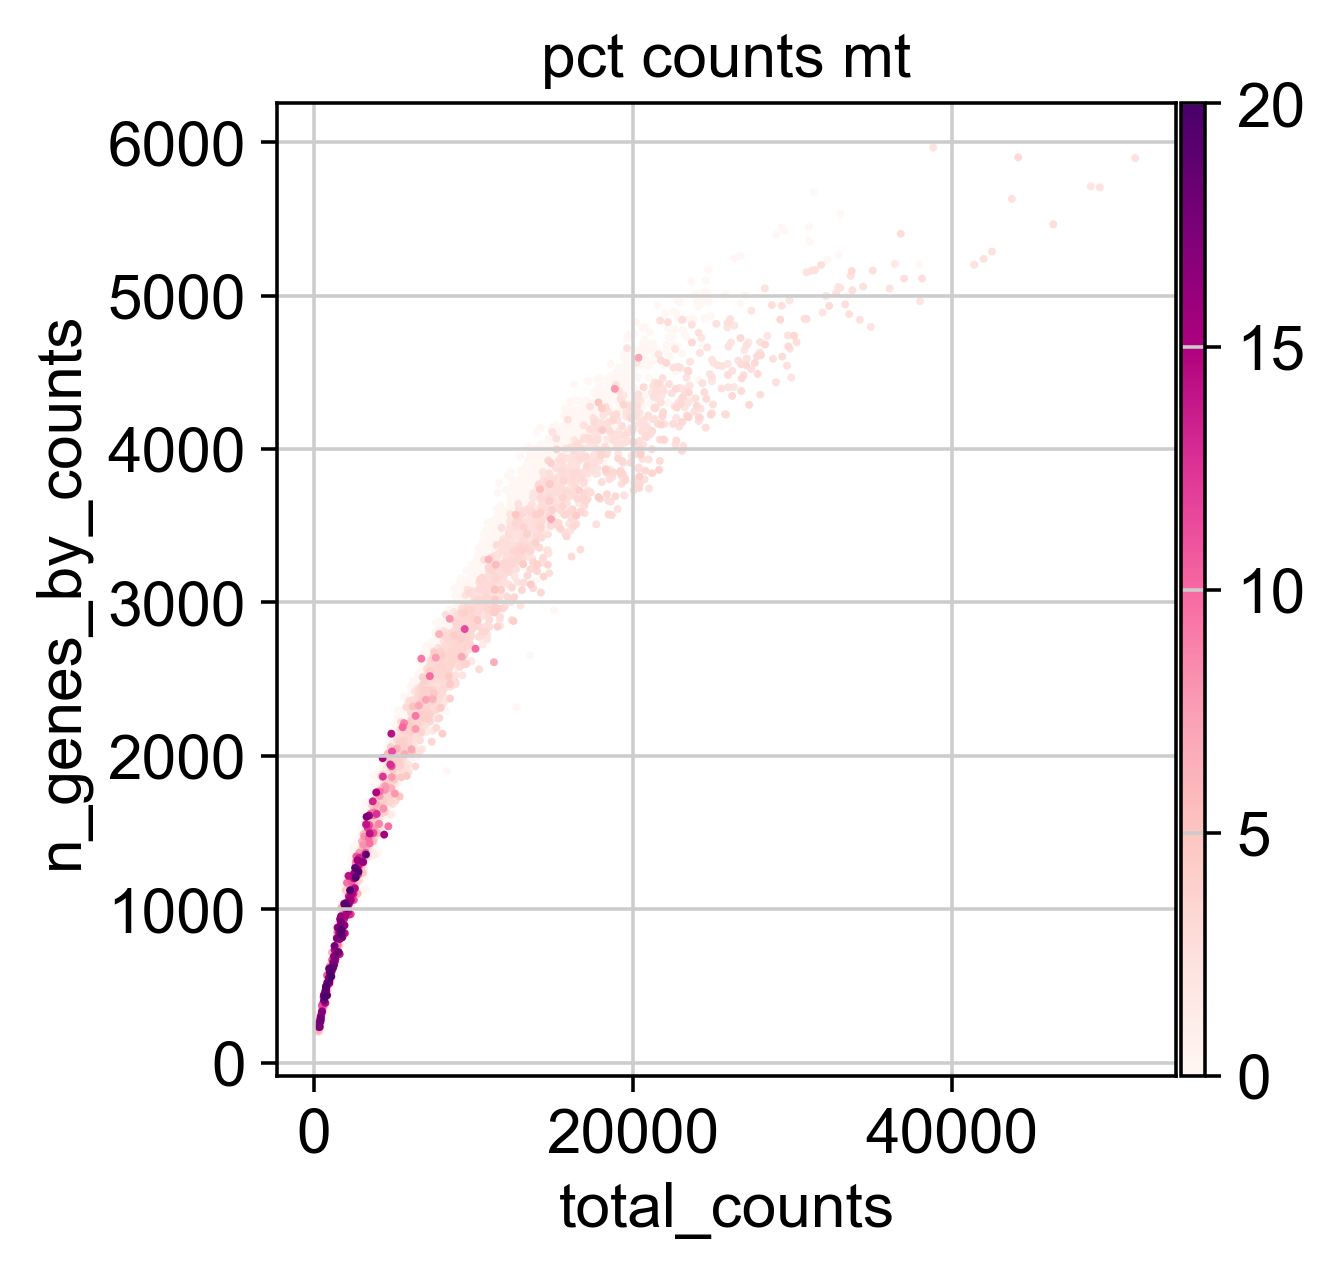

In [31]:
p1 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Add sample sex covariate

In [32]:
annot = sc.queries.biomart_annotations(
        "mmusculus",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [33]:
annot.head()

,ensembl_gene_id,start_position,end_position,chromosome_name
external_gene_name,,,,
mt-Tf,ENSMUSG00000064336,1,68,MT
mt-Rnr1,ENSMUSG00000064337,70,1024,MT
mt-Tv,ENSMUSG00000064338,1025,1093,MT
mt-Rnr2,ENSMUSG00000064339,1094,2675,MT
mt-Tl1,ENSMUSG00000064340,2676,2750,MT


- Y chrom

In [34]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Ddx3y', 'Eif2s3y', 'Gm29650', 'Kdm5d', 'Uty'], dtype='object')

In [35]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chrom

In [36]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['1810030O07Rik', '2010308F09Rik', '3830403N18Rik', '6030498E09Rik',
       '8030474K03Rik', 'A230072E10Rik', 'Abcb7', 'Abcd1', 'Acot9', 'Acsl4',
       ...
       'Zfp182', 'Zfp275', 'Zfp280c', 'Zfp300', 'Zfp449', 'Zfx', 'Zmat1',
       'Zmym3', 'Zrsr2', 'Zxdb'],
      dtype='object', length=415)

In [37]:
chrX_sum = sample_object[:, chrX_genes].X.sum(axis=1)
total_sum = sample_object.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
sample_object.obs['percent_chrX'] = (np.asarray(chrX_sum).flatten() / np.asarray(total_sum).flatten()) * 100
sample_object.obs

,experiment,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,mt_ok,percent_chrY,percent_chrX
7-PBS,PBS,4004,4003,15616.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,True,0.000000,0.000000
37-PBS,PBS,338,338,501.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,True,0.000000,0.000000
179-PBS,PBS,635,635,1121.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,True,0.000000,0.000000
296-PBS,PBS,2073,2073,5466.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,True,0.000000,0.000000
436-PBS,PBS,2418,2418,7798.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,True,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGGGCTTGA-1-BCG,BCG,2152,2151,5753.0,199.0,3.459065,1747.0,30.366766,0.0,0.000000,True,0.000000,3.302625
TTTGGTTCATTGGGCC-1-BCG,BCG,364,364,596.0,44.0,7.382550,166.0,27.852350,0.0,0.000000,True,0.000000,2.348993
TTTGTCAAGGCCCGTT-1-BCG,BCG,3076,3074,9899.0,268.0,2.707344,3088.0,31.195072,0.0,0.000000,True,0.010102,3.646833
TTTGTCAGTCTCACCT-1-BCG,BCG,345,345,522.0,4.0,0.766284,198.0,37.931034,0.0,0.000000,True,0.000000,3.831418


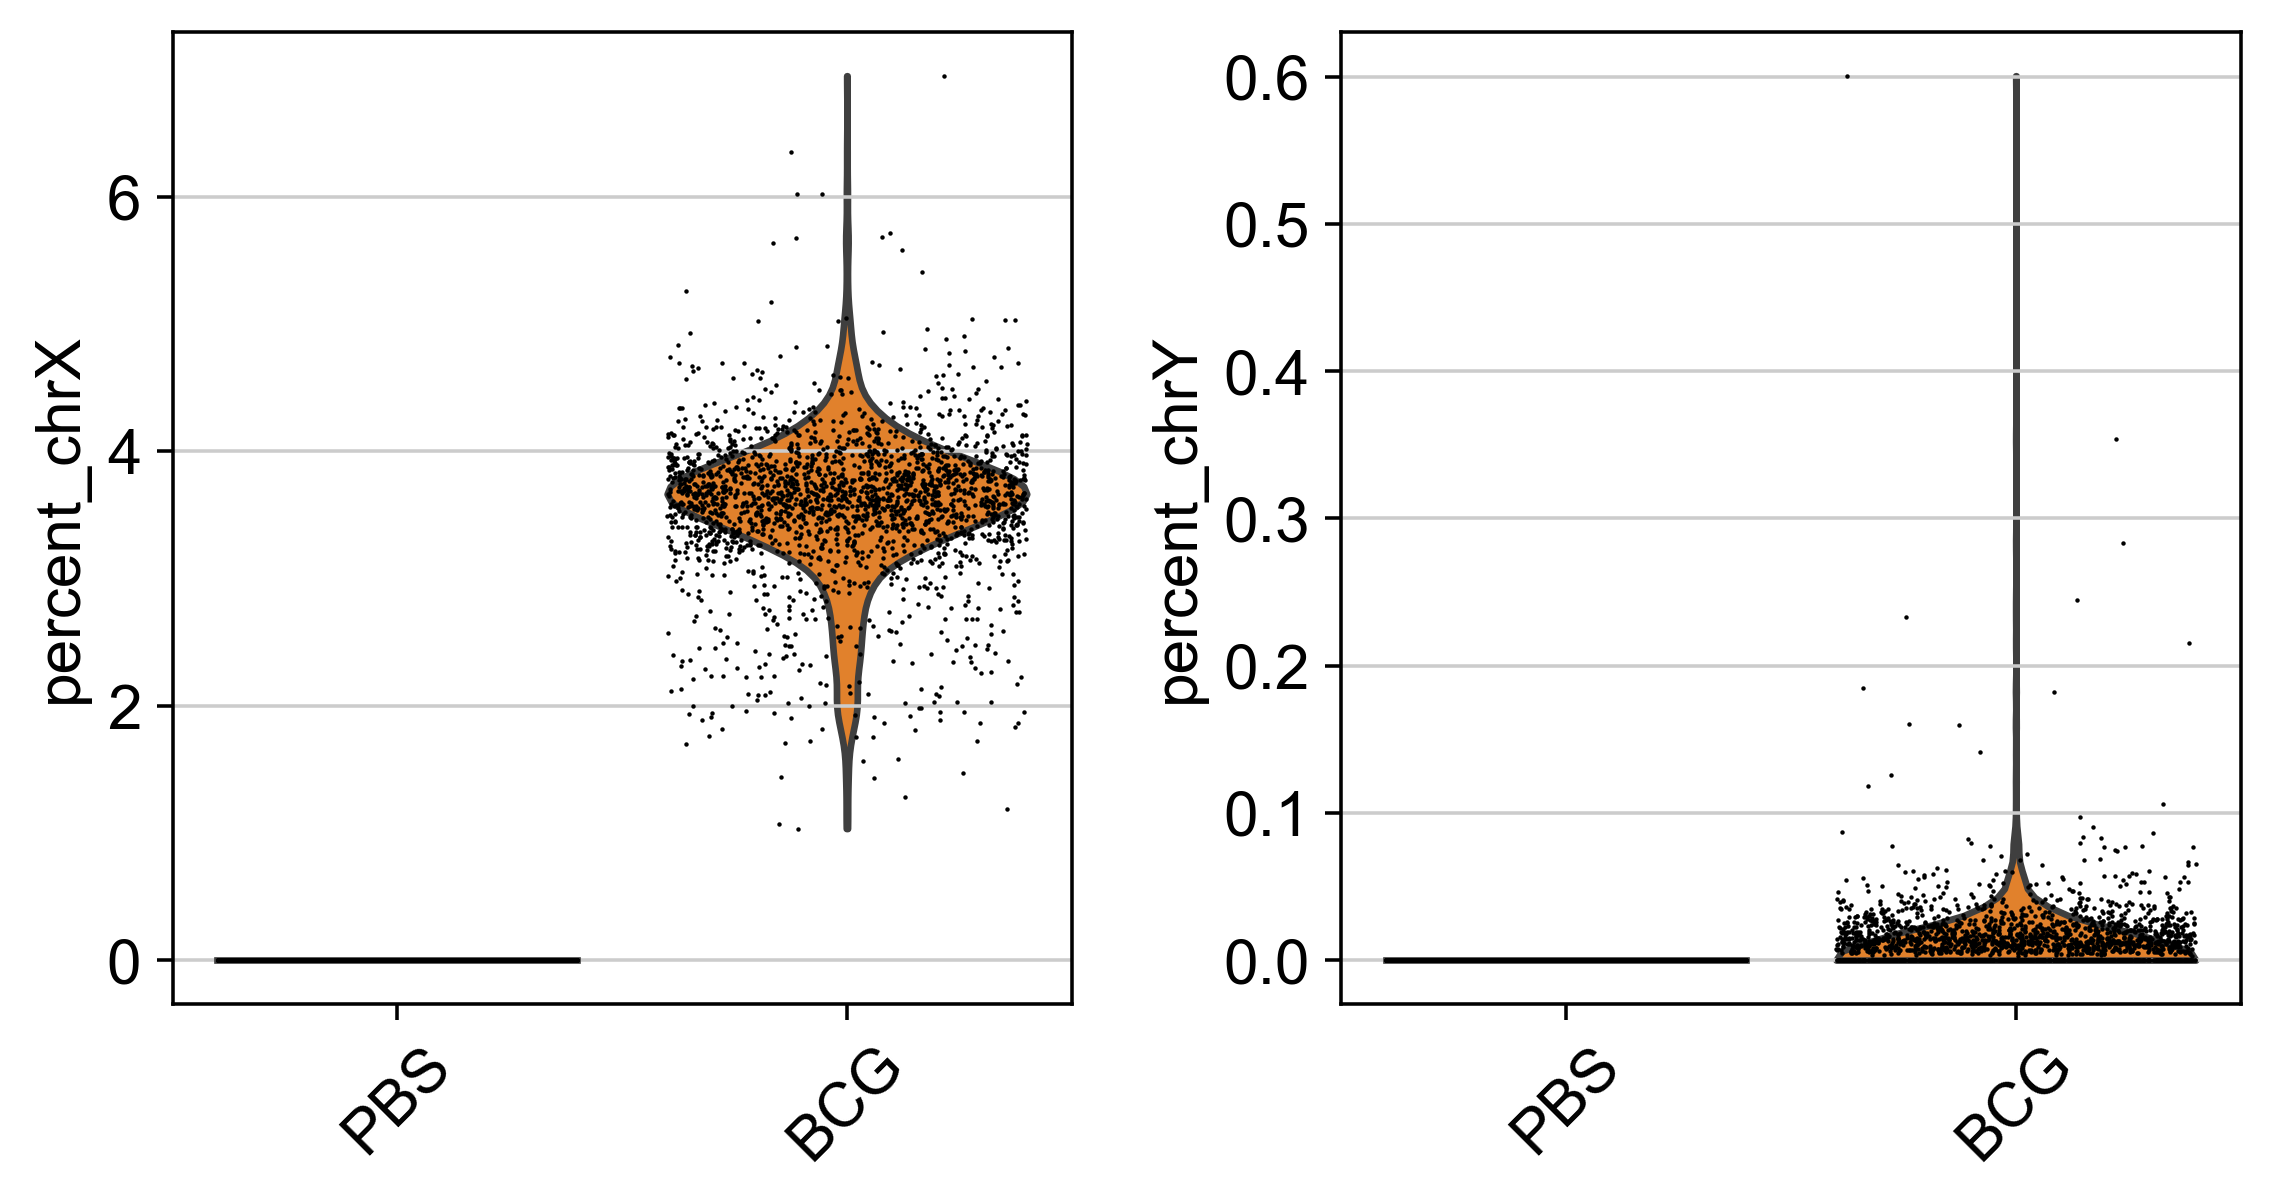

In [38]:

sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'experiment', rotation = 45)

### Cell cycle scores

In [39]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt https://raw.githubusercontent.com/hbc/tinyatlas/master/cell_cycle/Mus_musculus.csv

zsh:1: parse error near `https://raw.githubus...'


In [40]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
g2m_genes = cell_cycle_genes[:54]
s_genes = cell_cycle_genes[54:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
96


In [41]:
# create other anndata object for score calculation

adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['13355', '19328', '19330', '27228', '27910', '27911', '27913', '27914', '27920', '9017', '9931', 'Malat1', 'mt-Atp6', 'mt-Co1']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    516 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


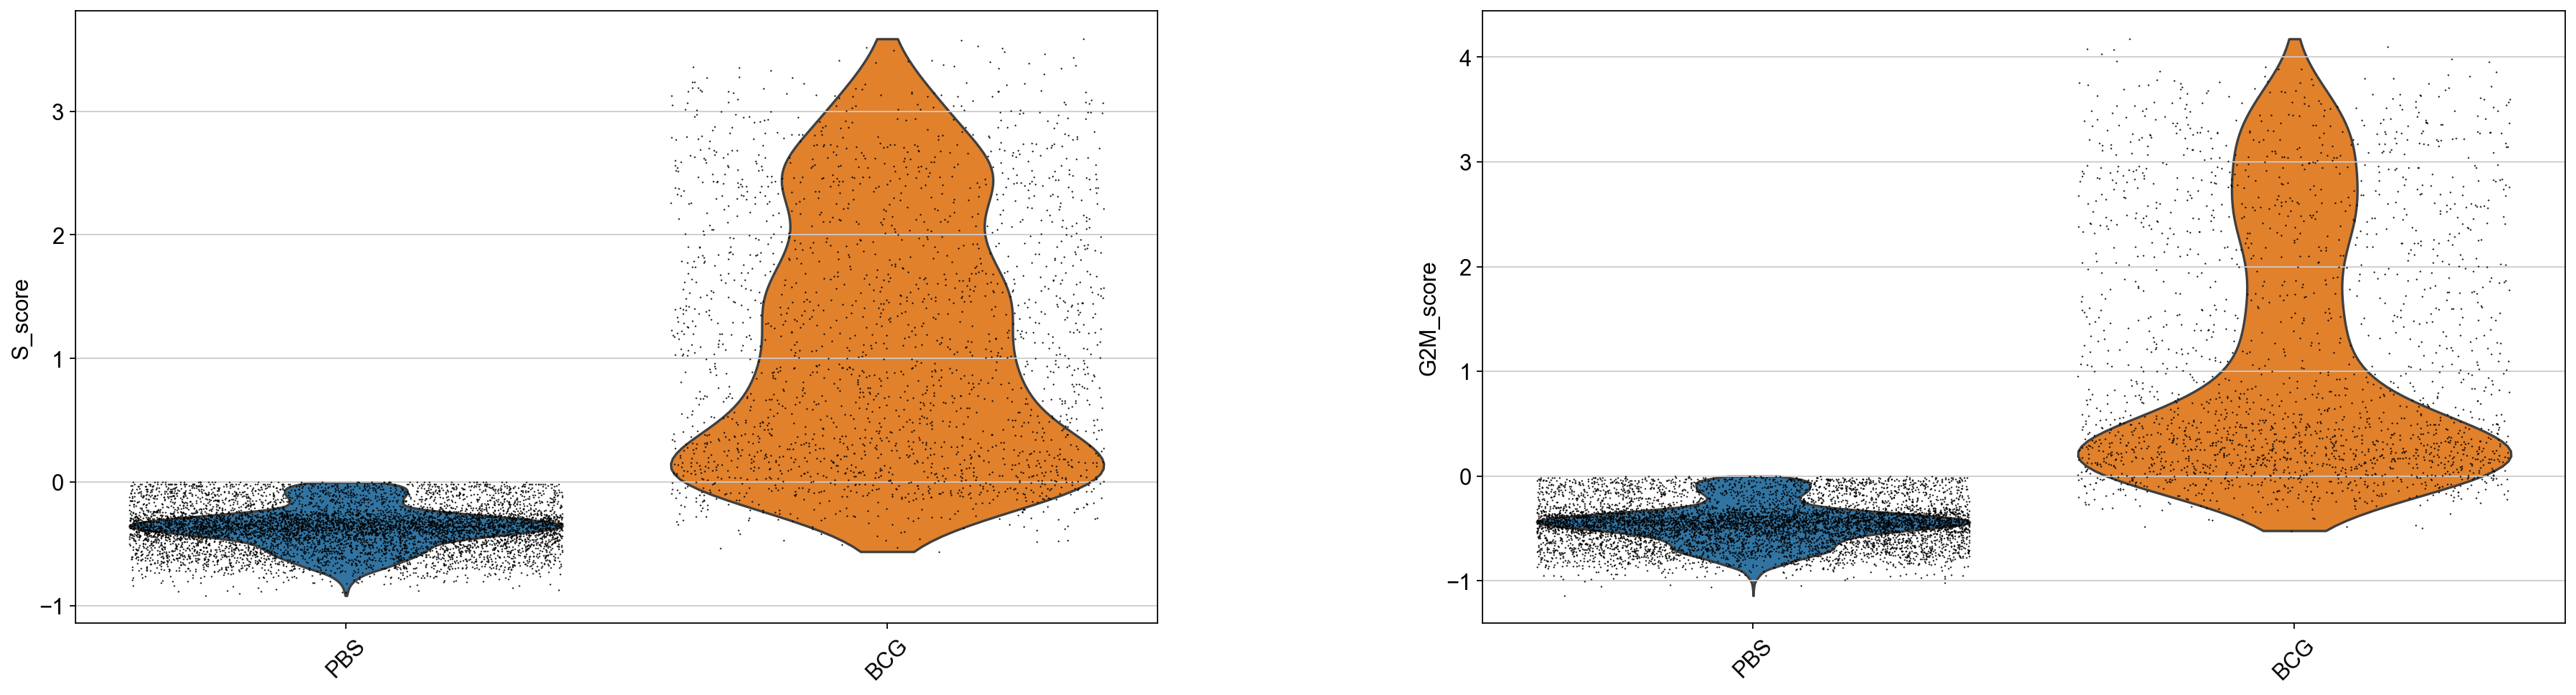

In [42]:
# Set specific figure params
sc.set_figure_params(figsize=(10, 7))

sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'experiment', rotation = 45)

In [43]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 9415 × 29175
    obs: 'experiment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'gene_ids-BCG', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'experiment_colors'

### Predict doublets

In [48]:
import scrublet

In [49]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 41.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.9%
Elapsed time: 7.5 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

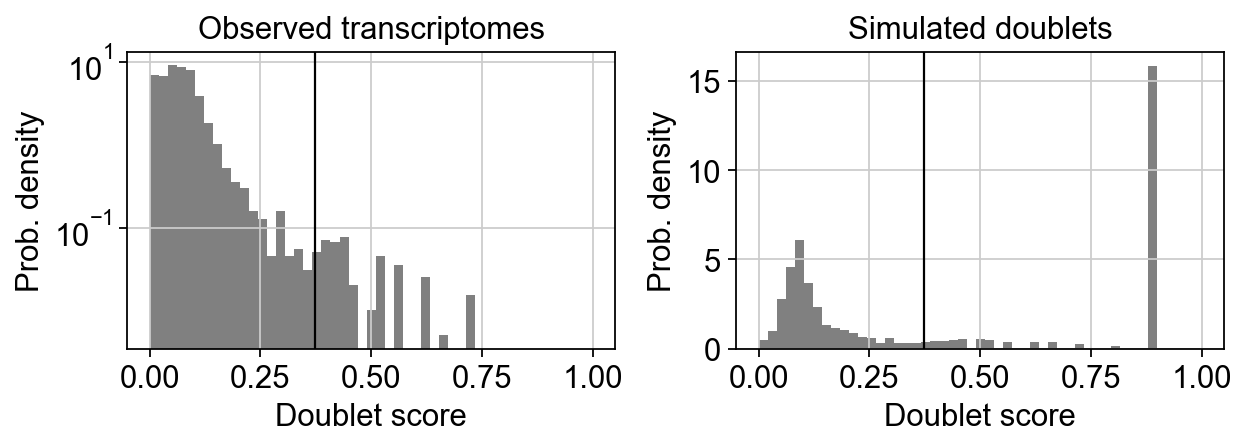

In [50]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [51]:
sum(sample_object.obs['predicted_doublets'])

73

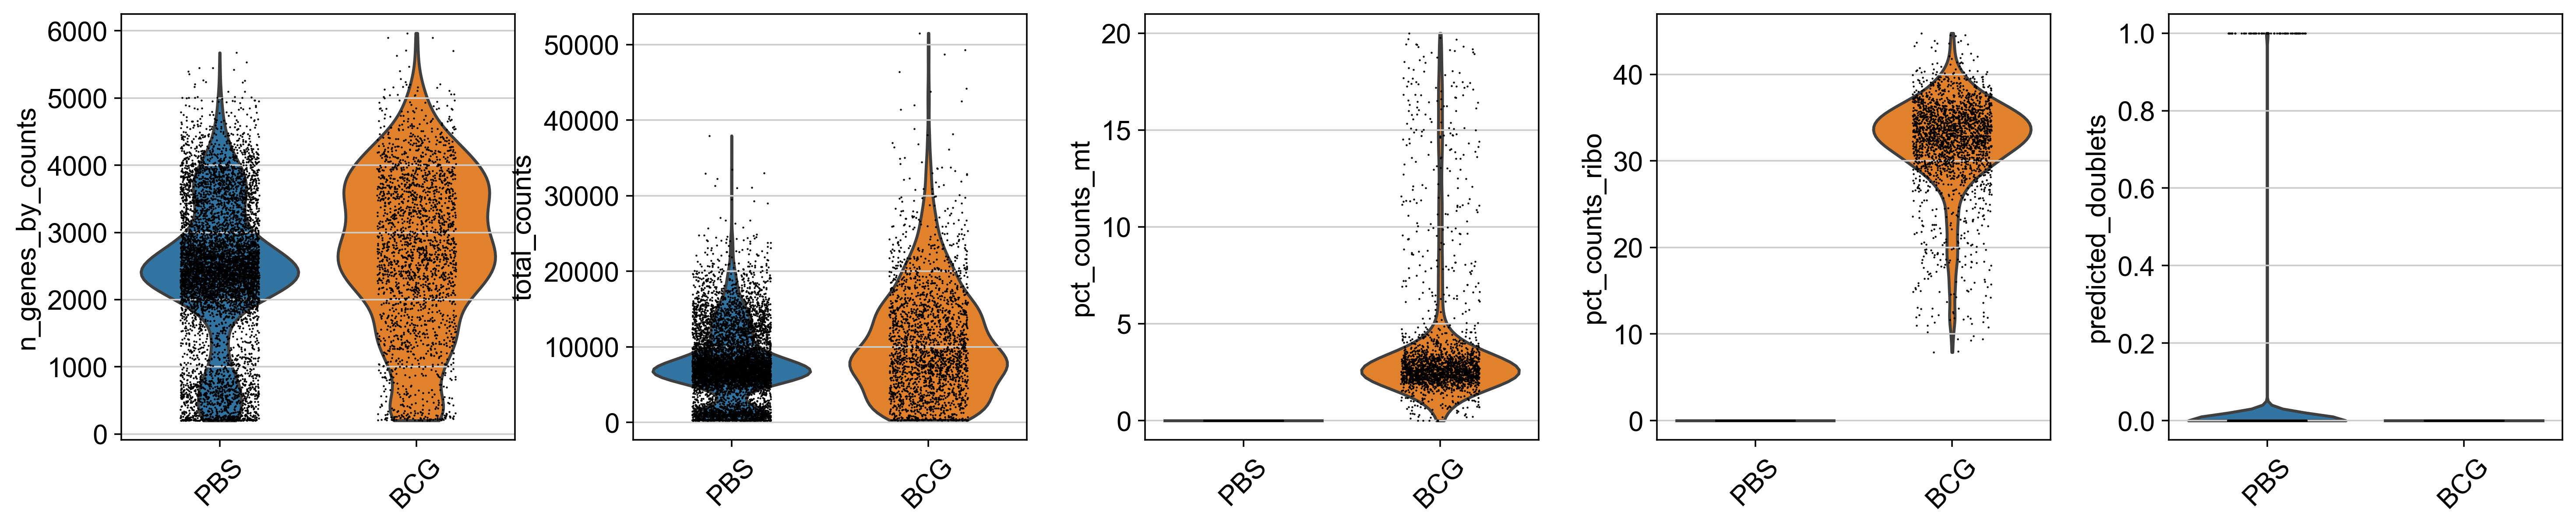

In [52]:
# Re-set figure params
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

# Plot doublet detection results
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'experiment', rotation = 45, multi_panel=False)

### Prepare counts for individual slots

In [53]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 9415 × 29175
    obs: 'experiment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids-BCG', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'experiment_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [54]:
sample_object.write('/Volumes/Lacie/data_lake/Mairi_example/processed_files/abridged_qc/mice/Kaufmann2017_multiomic_BM_mm_230308_qcd.h5ad')